In [1]:
###Linear Regression experiment with weather Data ###

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
#import sklern
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('weather.csv')

C:\Users\Ted\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
x = data[["MaxTemp"]]
y = data[["MinTemp"]]

In [14]:
y.head()

,MinTemp
0,22.222222
1,21.666667
2,22.222222
3,22.222222
4,21.666667


In [15]:
x.head()

,MaxTemp
0,25.555556
1,28.888889
2,26.111111
3,26.666667
4,26.666667


In [36]:
#####First we are pplying normal linear regression####

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 0)

In [69]:
y_train.head()

,MinTemp
80954,22.777778
7926,23.333333
113642,20.000000
68435,21.111111
41044,18.333333


In [70]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
y_pred = regressor.predict(x_test)

In [72]:
y_pred = pd.DataFrame(y_pred)

In [73]:
y_pred.head()

,0
0,19.354377
1,21.219182
2,17.955774
3,19.354377
4,14.692366


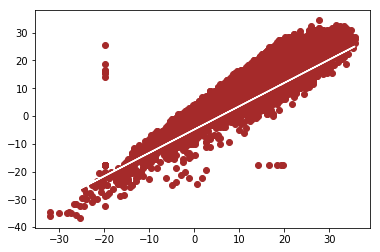

In [92]:
plt.scatter(y_pred, y_test, color = 'brown')
plt.plot(y_pred, regressor.predict(y_pred), color = 'white')
plt.show()

In [75]:
from sklearn import metrics
accuracy = metrics.r2_score(y_test,y_pred)
accuracy

0.7701967649436585

In [82]:
from sklearn.metrics import confusion_matrix
#y_pred = y_pred.values
y_test = y_test.values


In [83]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [84]:
cm

array([[29760]], dtype=int64)

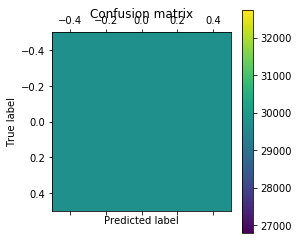

In [85]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [93]:
###### Now will aplly the normalization technique to see if we get better results####

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [98]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [100]:
y.head()

,0
0,0.832061
1,0.824427
2,0.832061
3,0.832061
4,0.824427


In [101]:
x.head()

,0
0,0.706667
1,0.746667
2,0.713333
3,0.720000
4,0.720000


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 0)

In [103]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
y_pred = regressor.predict(x_test)

In [105]:
y_pred

array([[0.79265557],
       [0.81827883],
       [0.77343812],
       ...,
       [0.81827883],
       [0.85671373],
       [0.79906138]])

In [106]:
y_pred = pd.DataFrame(y_pred)

In [107]:
y_pred.head()

,0
0,0.792656
1,0.818279
2,0.773438
3,0.792656
4,0.728597


In [108]:
y_test = pd.DataFrame(y_test)

In [109]:
y_test.head()

,0
21441,0.870229
5719,0.816794
52102,0.763359
8775,0.832061
88657,0.603053


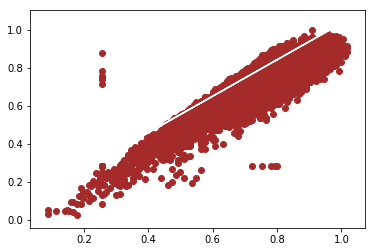

In [110]:
plt.scatter(y_pred, y_test, color = 'brown')
plt.plot(y_pred, regressor.predict(y_pred), color = 'white')
plt.show()

In [111]:
from sklearn import metrics
accuracy = metrics.r2_score(y_test,y_pred)
accuracy

0.7701967649436585

In [112]:
### So There is no accuracy change as there is less number of variabiity here ####